In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
train_data = "../data/yelpreview/yelp-train-tiny-bert-trunc.jsonl"

In [49]:
with open(train_data) as f:
    df = pd.read_json(f, lines=True)
df

/tmp/ipykernel_1694/3721486515.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(f, lines=True)
/tmp/ipykernel_1694/3721486515.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(f, lines=True)
/tmp/ipykernel_1694/3721486515.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old b

,0,1,2,3,4,text,label,label_text,pseudo_gt
0,0.538064,0.295388,0.124824,0.029194,0.012530,as soon as i learned that this was once the'de...,4,great,0
1,0.000370,0.005726,0.476479,0.495720,0.021705,"i like coming to cane's for chicken fingers, c...",2,okay,3
2,0.010392,0.099322,0.659403,0.206663,0.024220,"well, finally tried the place with the green d...",1,bad,2
3,0.001079,0.011428,0.572142,0.373601,0.041751,went for the brunch saturday morning and the l...,2,okay,2
4,0.038014,0.042831,0.120260,0.282659,0.516237,finally a place to watch local sports with sou...,2,okay,4
...,...,...,...,...,...,...,...,...,...
12995,0.997162,0.001495,0.000390,0.000295,0.000658,i wouldn't even give this bar 1 star. went her...,0,terrible,0
12996,0.000142,0.000083,0.001748,0.087946,0.910081,i am a pain in the ass. and i had battery issu...,4,great,4
12997,0.130436,0.765853,0.096732,0.004939,0.002040,2. 5 went a weekend with friends that go to ve...,1,bad,1
12998,0.139104,0.745794,0.113348,0.001555,0.000199,a place for happy hour and a spiritied atmosph...,1,bad,1


In [50]:
print(f"Accuracy (PseudoGT vs GT): {sum((df['pseudo_gt']==df['label']))/len(df)}")

Accuracy (PseudoGT vs GT): 0.6343076923076924


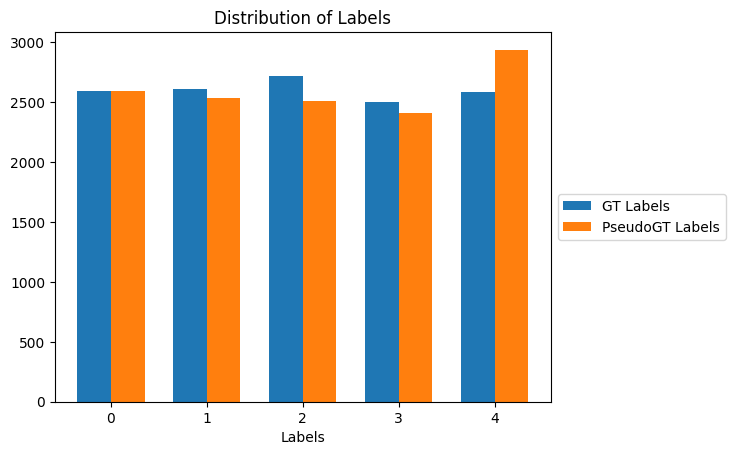

In [56]:
labels = list(set(df['label']))
def count_label(column_name):
    cnt = []
    for l in labels:
        num = len(df.loc[df[column_name]==l])
        cnt.append(num)
    return cnt

pseudo_gt_labels = count_label('pseudo_gt')
gt_labels = count_label('label')

x = np.arange(len(labels))
bar_width = 0.35

fix,ax = plt.subplots()
bars1 = ax.bar(x-bar_width/2, gt_labels, bar_width, label="GT Labels")
bars2 = ax.bar(x+bar_width/2, pseudo_gt_labels, bar_width, label="PseudoGT Labels")

ax.set_xlabel("Labels")
ax.set_title("Distribution of Labels")
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))

plt.show()

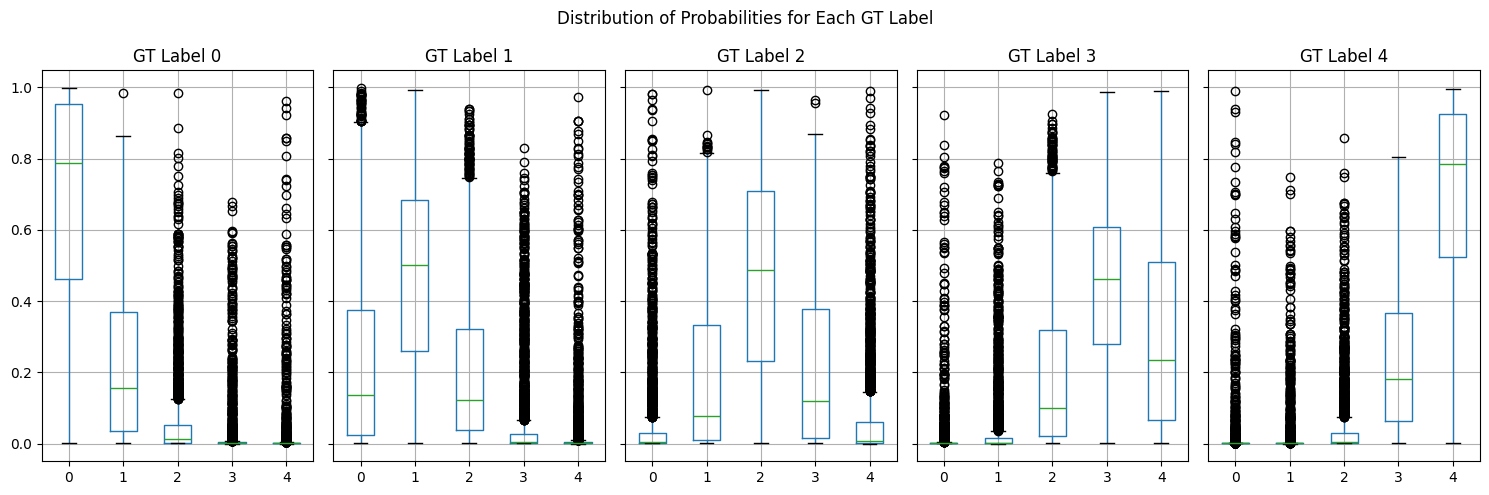

In [52]:
fix, axs = plt.subplots(1, len(labels), figsize=(15,5), sharey=True)
gt_prob = df[['label']+[str(i) for i in labels]]
for i, (label, group) in enumerate(gt_prob.groupby('label')):
    group.drop('label', axis=1).boxplot(ax=axs[i])
    axs[i].set_title(f'GT Label {label}')
plt.suptitle("Distribution of Probabilities for Each GT Label")
plt.tight_layout()
plt.show()

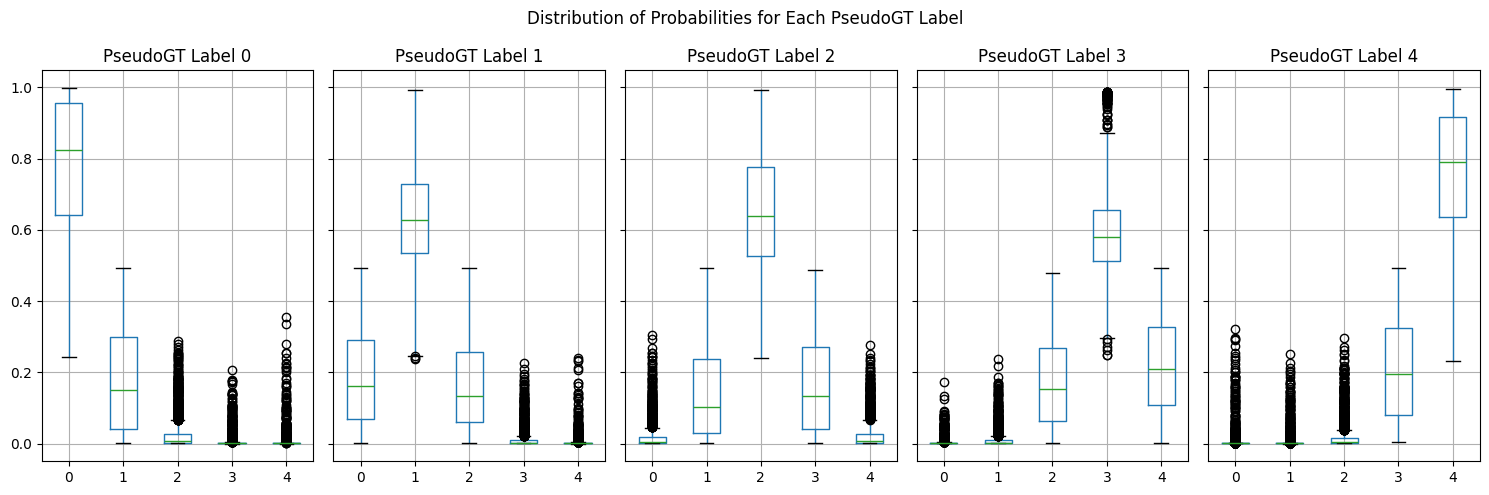

In [53]:
fix, axs = plt.subplots(1, len(labels), figsize=(15,5), sharey=True)
pseudo_gt_prob = df[['pseudo_gt']+[str(i) for i in labels]]
for i, (label, group) in enumerate(pseudo_gt_prob.groupby('pseudo_gt')):
    group.drop('pseudo_gt', axis=1).boxplot(ax=axs[i])
    axs[i].set_title(f'PseudoGT Label {label}')
plt.suptitle("Distribution of Probabilities for Each PseudoGT Label")
plt.tight_layout()
plt.show()